In [1]:
'''To Do List
change to .json to get the Luminosity distance --DONE,
use polynomial fit --DONE,
show some graphs of fitting --DONE,
show differnce in fitting graph,
type IIP supernova,
Philips relation'''

'To Do List\nchange to .json to get the Luminosity distance --DONE,\nuse polynomial fit --DONE,\nshow some graphs of fitting --DONE,\nshow differnce in fitting graph,\ntype IIP supernova,\nPhilips relation'

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import json
import torch
import math
import matplotlib.pyplot as plt

In [3]:
# Import the .json file

os.chdir(r"C:\Users\ricky\JupyterNotebooks\Intern21\import_photometry_data\typeIIP_photometry")
filename = glob.glob('*.json')
#print(filename)

# Create a list for all .json, the 1st SN saved as json_data[0], the 2nd SN saved as json_data[1], etc.
json_data = []
for i in filename:
    print(i)
    with open(i, encoding="utf-8") as f:
        json_data.append(json.load(f))

CSS141118_092034+504148.json
SN1999ca.json
SN1999cr.json
SN1999em.json
SN1999gi.json
SN2000cb.json
SN2001X.json
SN2003gd.json
SN2003hl.json
SN2004dj.json
SN2004et.json
SN2005ay.json
SN2005cs.json
SN2007ck.json
SN2007od.json
SN2008in.json
SN2009E.json
SN2009ib.json
SN2009js.json
SN2009N.json
SN2010id.json
SN2011ef.json
SN2012aw.json
SN2012ec.json
SN2013ab.json
SN2013am.json
SN2013bu.json
SN2013ej.json
SN2013fs.json
SN2013ft.json
SN2014cn.json
SN2014cx.json
SN2014cy.json
SN2014dq.json
SN2015V.json
SN2015W.json
SN2016esw.json
SN2016X.json
SN2017eaw.json


In [4]:
# To obtain absolute magnitude and time in a particular band

Band = [] # Contain EM band chosen for analysis
Magnitude_Abs = [] # Contain absolute magnitude
Time = [] # Contain time (day)

print(len(filename))

for i in range(len(filename)): # Loop through all SN
    Band.append([]) # Create 2D list
    Magnitude_Abs.append([])
    Time.append([])
    
    SN_name = filename[i].replace('.json', '')
    SN_name = SN_name.replace('_', ':')
    print(SN_name)
    N = len(json_data[i][SN_name]['photometry']) # The no. of data point of photometry in each SN
    
    for j in range(N): # Loop through all photemetry datapoint in one SN
        # Avoid any data point without band data
        try:
            Band[i].append(json_data[i][SN_name]['photometry'][j]['band'])
        except:
            Band[i].append(0)
        
        # Fill the Magnitude_Abs and Time list if the data point is in B band
        if Band[i][j] == 'B':
            Magnitude_App = float(json_data[i][SN_name]['photometry'][j]['magnitude']) # Obtain the apparent magnitude from photometry
            LumDist = float(json_data[i][SN_name]['lumdist'][0]['value']) # Obtain the luminosity distance
            z = float(json_data[i][SN_name]['redshift'][0]['value']) #Obtain the redshift, z
            Magnitude_Abs[i].append(Magnitude_App - 5*np.log10(LumDist*1e5) + 2.5*np.log10(1+z)) # Calculate the absolute magnitude and fill the Magnitude_Abs list
            Time[i].append(float(json_data[i][SN_name]['photometry'][j]['time'])) # Fill the Time list

'''print(Band[13])
print(Magnitude_Abs[13])
print(len(Time[13]))'''

39
CSS141118:092034+504148
SN1999ca
SN1999cr
SN1999em
SN1999gi
SN2000cb
SN2001X
SN2003gd
SN2003hl
SN2004dj
SN2004et
SN2005ay
SN2005cs
SN2007ck
SN2007od
SN2008in
SN2009E
SN2009ib
SN2009js
SN2009N
SN2010id
SN2011ef
SN2012aw
SN2012ec
SN2013ab
SN2013am
SN2013bu
SN2013ej
SN2013fs
SN2013ft
SN2014cn
SN2014cx
SN2014cy
SN2014dq
SN2015V
SN2015W
SN2016esw
SN2016X
SN2017eaw


'print(Band[13])\nprint(Magnitude_Abs[13])\nprint(len(Time[13]))'

id: 0 , SN: CSS141118_092034+504148.json , R^2 score: 0.3323630465049203 , Time of maximum brightness: 57205.448108526725


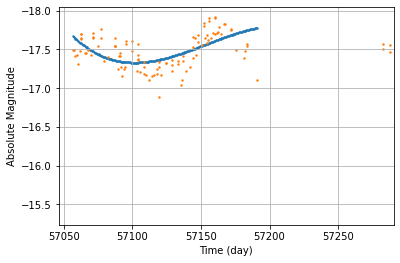

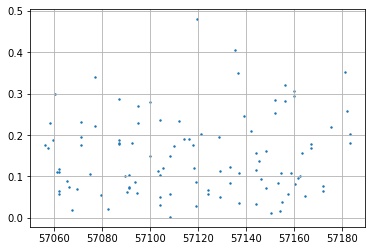

id: 2 , SN: SN1999cr.json , R^2 score: 0.996111156731779 , Time of maximum brightness: 51219.382957135866


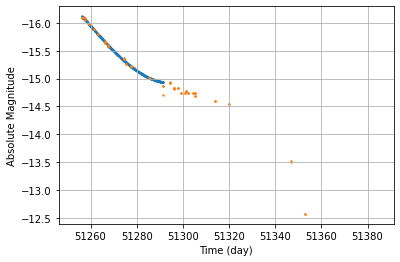

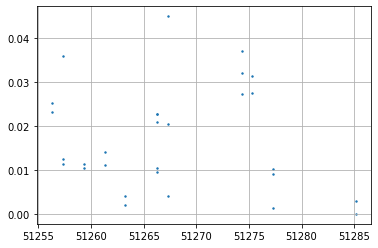

id: 3 , SN: SN1999em.json , R^2 score: 0.9388760245529508 , Time of maximum brightness: 51482.438635283834


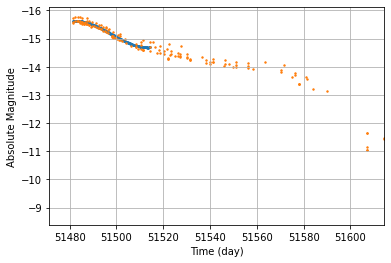

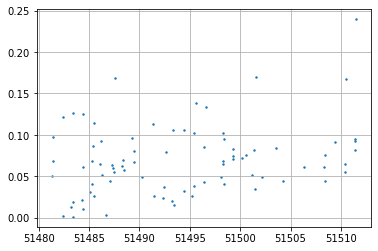

id: 7 , SN: SN2003gd.json , R^2 score: 0.9125807012457814 , Time of maximum brightness: nan


<ipython-input-5-c42ec88cc791>:31: RuntimeWarning: invalid value encountered in double_scalars
  Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))


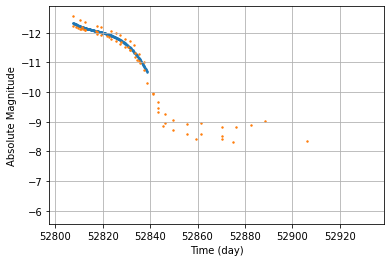

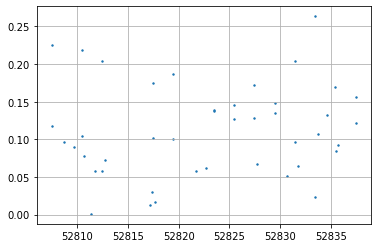

id: 9 , SN: SN2004dj.json , R^2 score: 0.9134780830383673 , Time of maximum brightness: 53175.11350232951


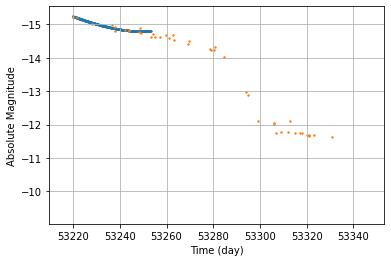

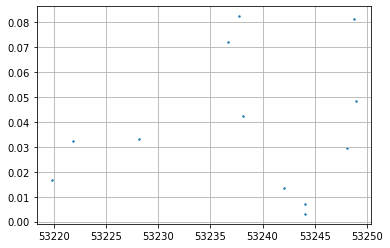

id: 10 , SN: SN2004et.json , R^2 score: 0.27869324078886826 , Time of maximum brightness: 53282.446787128225


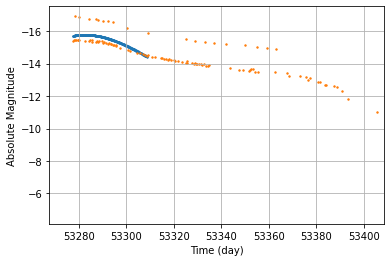

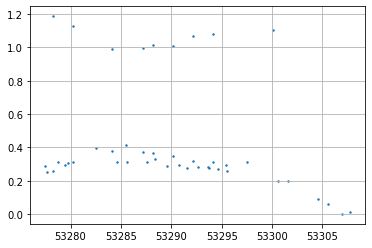

id: 12 , SN: SN2005cs.json , R^2 score: 0.6301379770336026 , Time of maximum brightness: 53557.869868668655


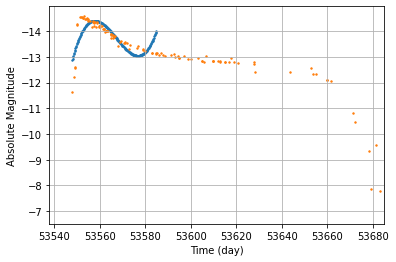

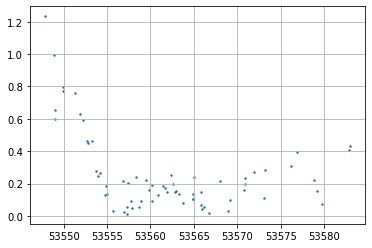

id: 14 , SN: SN2007od.json , R^2 score: 0.9748097968205524 , Time of maximum brightness: 54407.11290862921


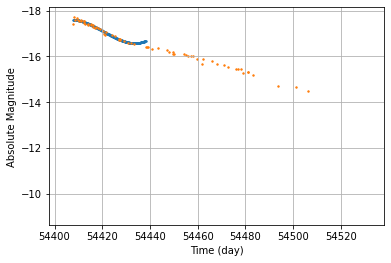

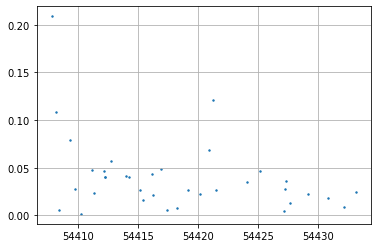

id: 15 , SN: SN2008in.json , R^2 score: 0.7453851671376783 , Time of maximum brightness: 54829.489709257614


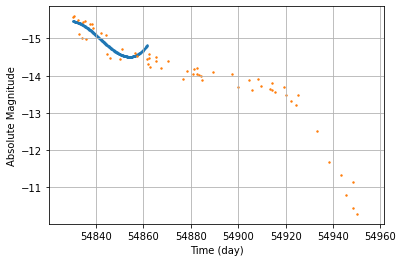

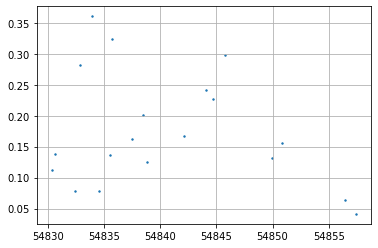

id: 19 , SN: SN2009N.json , R^2 score: 0.9713067332072717 , Time of maximum brightness: 54853.401357375544


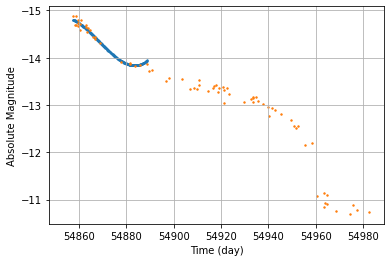

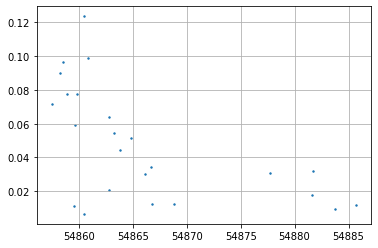

id: 22 , SN: SN2012aw.json , R^2 score: 0.9609685683816849 , Time of maximum brightness: 56011.76794865481


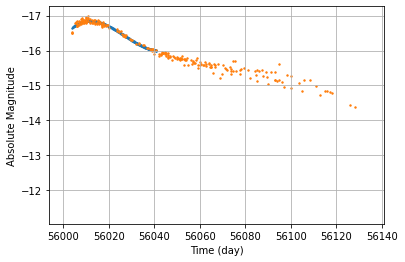

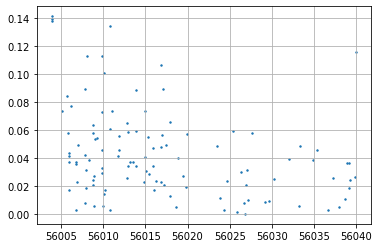

id: 24 , SN: SN2013ab.json , R^2 score: 0.9641498554592107 , Time of maximum brightness: 56344.428963140235


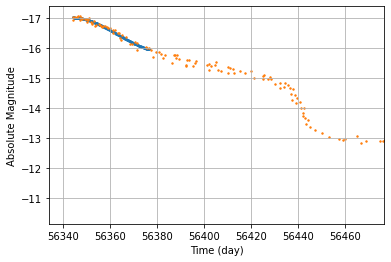

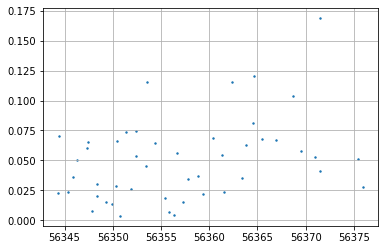

id: 26 , SN: SN2013bu.json , R^2 score: 0.9768336847409484 , Time of maximum brightness: 56406.535810112895


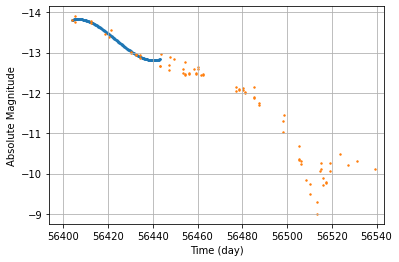

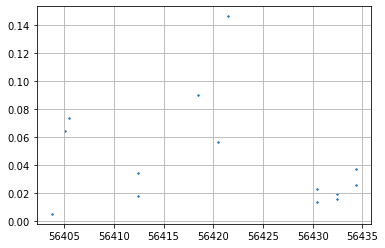

id: 27 , SN: SN2013ej.json , R^2 score: 0.9209723469263477 , Time of maximum brightness: 56508.846443049806


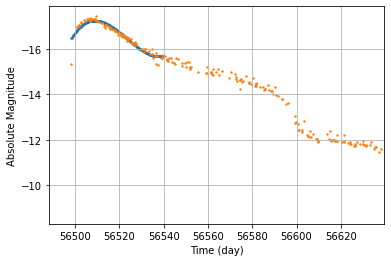

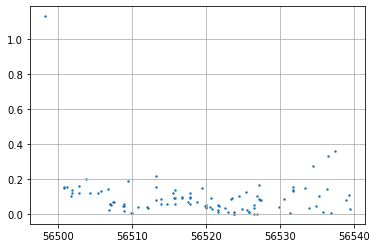

id: 28 , SN: SN2013fs.json , R^2 score: 0.9653344119367496 , Time of maximum brightness: 56574.836952875165


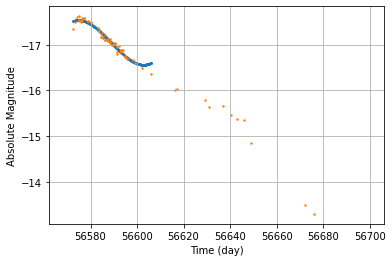

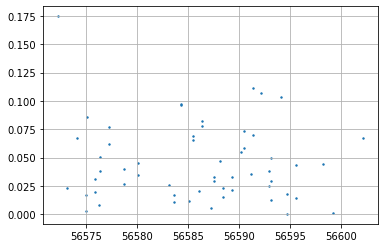

id: 31 , SN: SN2014cx.json , R^2 score: 0.9036500468868369 , Time of maximum brightness: 56910.812025512016


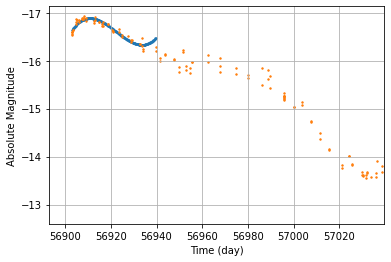

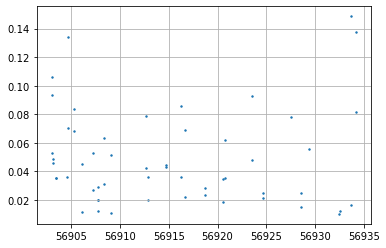

id: 32 , SN: SN2014cy.json , R^2 score: 0.9712237136492385 , Time of maximum brightness: 56900.42020913808


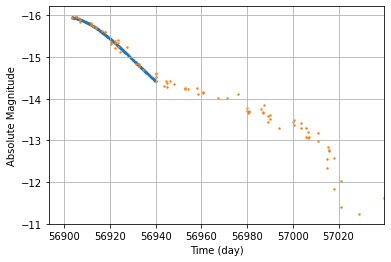

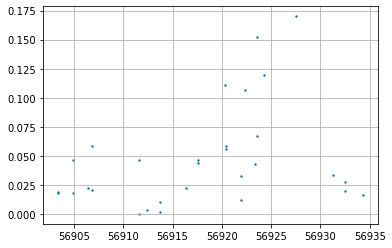

id: 37 , SN: SN2016X.json , R^2 score: 0.9573923046836799 , Time of maximum brightness: 57416.35920163259


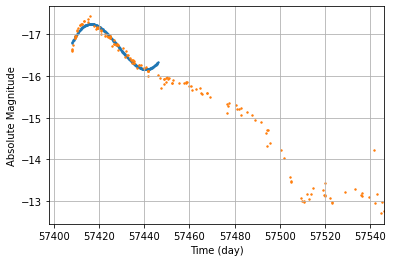

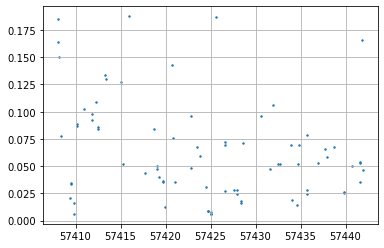

id: 38 , SN: SN2017eaw.json , R^2 score: 0.97133982039605 , Time of maximum brightness: 57892.80941171239


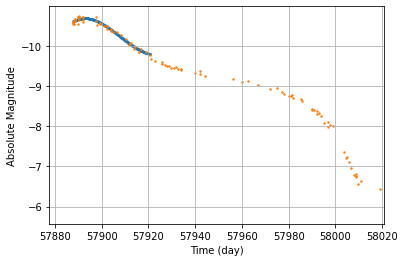

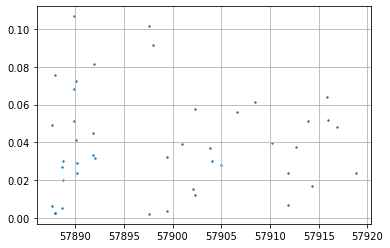

[2, 3, 9, 14, 19, 22, 24, 26, 27, 28, 31, 32, 37, 38]


In [5]:
# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 30 # Num of days after the maximum used for peak fitting from the peak

for i in range(len(filename)): # Loop through all SN
    if len(Time[i]) > 60: # Avoid list with too few data
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 30 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        m = Magnitude_Abs[i][:maximum + j]
        t = Time[i][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        
        # Save the time of maximum magnitude
        Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, P(t)), ', Time of maximum brightness:', Time_max[i])        
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], 200)
        Y = P(X)
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 100)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
        
        # Print the graph of difference in fitting
        plt.scatter(t, abs(m - P(t)), s=2)
        plt.grid()
        plt.show()
    
        if (r2_score(m, P(t)) > 0.8) & (not math.isnan(Time_max[-1])):
            Succ_graph.append(i)
        
    else:
        Time_max.append(0)
        
print(Succ_graph)

In [6]:
Time_shifted = [] # Save the shifted time list for better result demonstration (All light curve peaking at day 0)

for i in range(len(filename)):
    Time_shifted.append([]) # Create 2D list
    diff = Time_max[i] - Time_max[0] 
    for j in range(len(Time[i])): # Calculate the shifted time list
        Time_shifted[i].append(Time[i][j] - diff - Time_max[0])

print(len(Time_shifted))

39


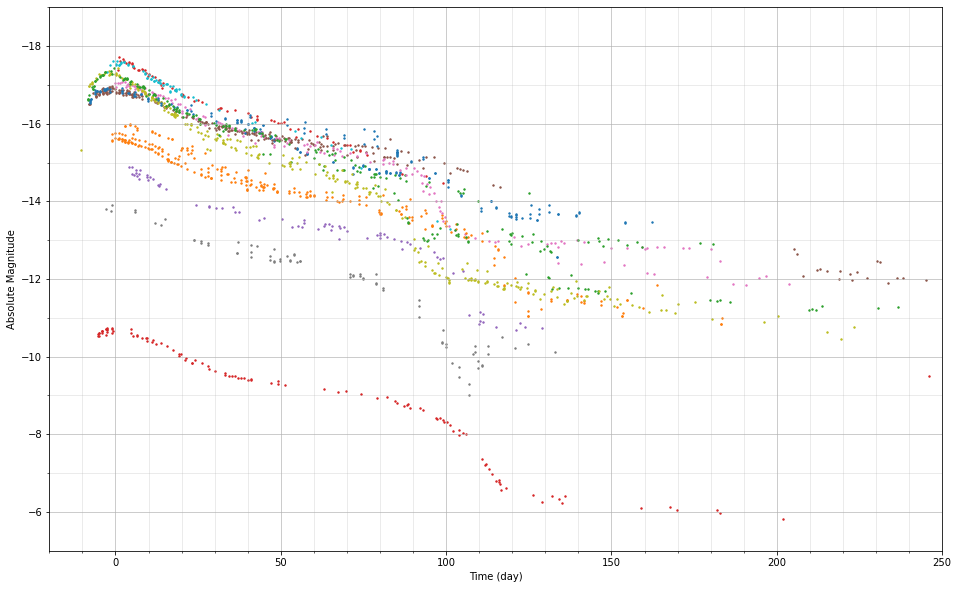

In [7]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)

plt.gca().invert_yaxis()

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(-50, 600, 50)
minor_ticks_x = np.arange(-50, 600, 10)

major_ticks_y = np.arange(-22, -5, 2)
minor_ticks_y = np.arange(-22, -5, 1)


ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)

ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.grid(which='major', alpha=0.8)
ax.grid(which='minor', alpha=0.3)

plt.xlabel('Time (day)')
plt.ylabel('Absolute Magnitude')

plt.xlim(-20, 250)
plt.ylim(-5, -19)

for i in range(len(Succ_graph)):
    plt.scatter(Time_shifted[Succ_graph[i]], Magnitude_Abs[Succ_graph[i]], s=2)